In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import random

In [ ]:
import shutil

shutil.rmtree('/content/asl_alphabet/asl_alphabet_train/asl_alphabet_train/del', ignore_errors=True)

In [ ]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

100%|██████████| 1.03G/1.03G [00:48<00:00, 22.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [ ]:
import shutil

target_path = '/content/asl_alphabet'

# Move the dataset folder to /content
shutil.move(path, target_path)

print(f"Dataset moved to {target_path}")

Dataset moved to /content/asl_alphabet


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
import os
import shutil

# Define the path for the original test folder and where to organize it
test_dir = '/content/asl_alphabet/asl_alphabet_test/asl_alphabet_test'
organized_test_dir = '/content/asl_alphabet/organized_test'

# Create the main directory for organized test data
if not os.path.exists(organized_test_dir):
    os.makedirs(organized_test_dir)

# List all test image files
test_images = os.listdir(test_dir)

# Loop through each image file in the test directory
for image in test_images:
    # Extract the class label (e.g., 'A' from 'A_test.jpg')
    label = image.split('_')[0]

    # Create a subdirectory for the label if it doesn't exist
    label_dir = os.path.join(organized_test_dir, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # Move the image to the appropriate subdirectory
    src_path = os.path.join(test_dir, image)
    dest_path = os.path.join(label_dir, image)
    shutil.move(src_path, dest_path)

print("Test images have been reorganized into subdirectories.")


Test images have been reorganized into subdirectories.


In [ ]:
# Define directories for train and test data
train_dir = '/content/asl_alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '/content/asl_alphabet/organized_test'

In [ ]:
print("Train directory structure:", os.listdir(train_dir))
print("Test directory structure:", os.listdir(test_dir))

Train directory structure: ['D', 'B', 'nothing', 'L', 'W', 'J', 'N', 'F', 'U', 'K', 'Y', 'del', 'V', 'H', 'Z', 'space', 'C', 'P', 'O', 'E', 'R', 'T', 'S', 'I', 'X', 'A', 'Q', 'G', 'M']
Test directory structure: ['D', 'B', 'nothing', 'L', 'W', 'J', 'N', 'F', 'U', 'K', 'Y', 'V', 'H', 'Z', 'space', 'C', 'P', 'O', 'E', 'R', 'T', 'S', 'I', 'X', 'A', 'Q', 'G', 'M']


In [ ]:
import shutil

# Define the path to the folder you want to delete
folder_path = '/content/asl_alphabet/asl_alphabet_train/asl_alphabet_train/del'

# Use shutil.rmtree to remove the folder and its contents
shutil.rmtree(folder_path, ignore_errors=True)

In [ ]:
# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',  # Multi-class classification (A-Z)
)

Found 84000 images belonging to 28 classes.


In [ ]:
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

Found 28 images belonging to 28 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')  # 26 classes (A-Z)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,764,124 (33.43 MB)

 Trainable params: 8,764,124 (33.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2625/2625 ━━━━━━━━━━━━━━━━━━━━ 134s 48ms/step - accuracy: 0.5893 - loss: 1.3952 - val_accuracy: 0.9643 - val_loss: 0.1204
Epoch 2/5
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 126s 48ms/step - accuracy: 0.9704 - loss: 0.0908 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 3/5
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 124s 47ms/step - accuracy: 0.9816 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 6.8581e-05
Epoch 4/5
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 138s 52ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 6.9928e-04
Epoch 5/5
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 128s 49ms/step - accuracy: 0.9918 - loss: 0.0279 - val_accuracy: 1.0000 - val_loss: 3.4783e-06


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 3.4783e-06
Test Accuracy: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
filenames = test_data.filenames
true_classes = test_data.classes

# Get class labels
class_labels = list(test_data.class_indices.keys())

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


<Figure size 1200x1200 with 0 Axes>

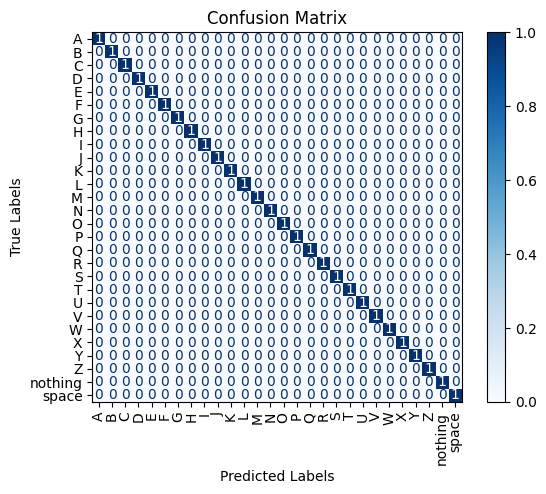

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


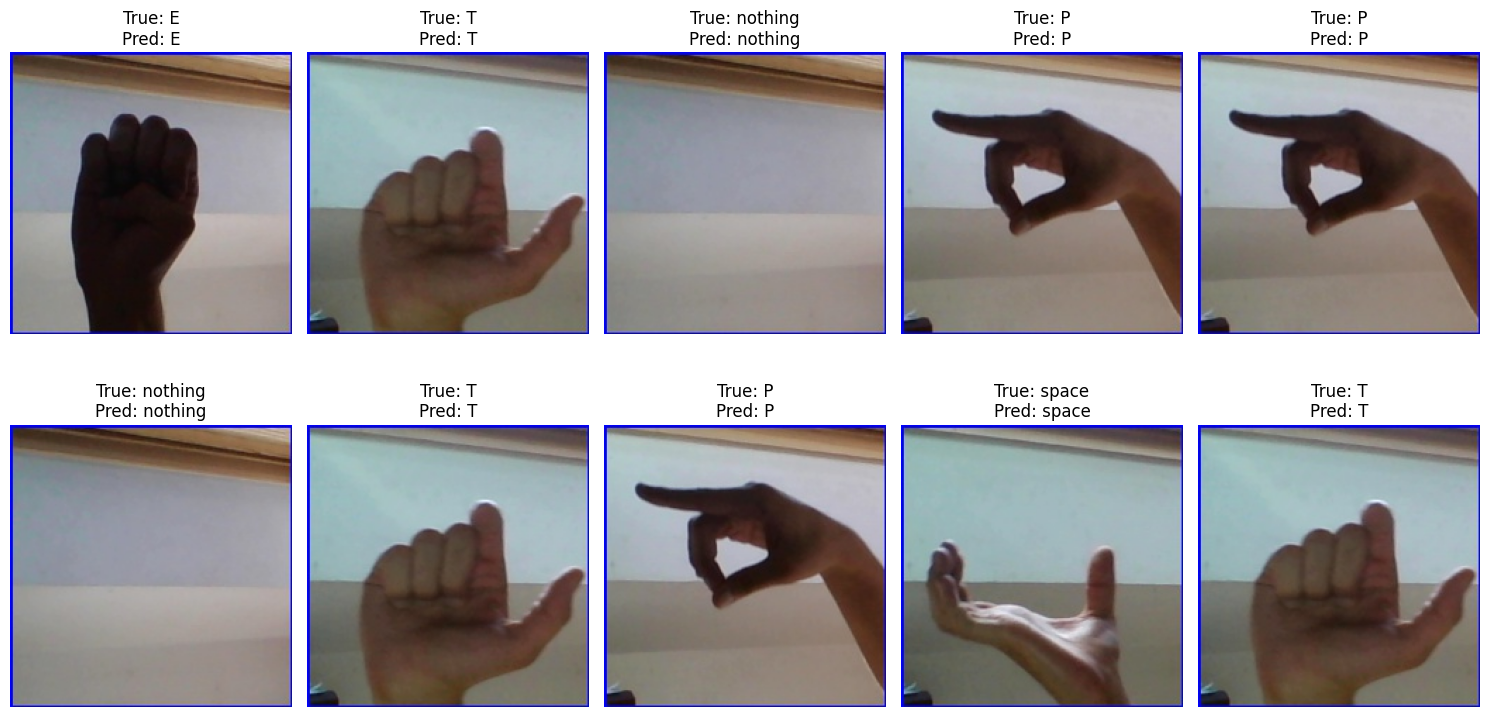

In [ ]:
test_batch, test_labels = next(test_data)

num_images = 10
plt.figure(figsize=(15, 8))

for i in range(num_images):
    # Pick a random image and label
    random_index = random.randint(0, len(test_batch) - 1)
    random_image = test_batch[random_index]
    true_label = np.argmax(test_labels[random_index])

    # Predict the label
    predicted_label = np.argmax(model.predict(random_image[np.newaxis, ...], verbose=0))

    plt.subplot(2, 5, i + 1)
    plt.imshow(random_image)
    plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#**EDGE Detection**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import filters
from scipy import ndimage
import random

In [ ]:
# Load a batch of test images
test_batch, test_labels = next(test_data)

# Choose a random image from the batch
random_index = random.randint(0, len(test_batch) - 1)
image = test_batch[random_index]

(<matplotlib.image.AxesImage at 0x7a271e0bc310>,
 Text(0.5, 1.0, 'Original Image'),
 (-0.5, 199.5, 199.5, -0.5))

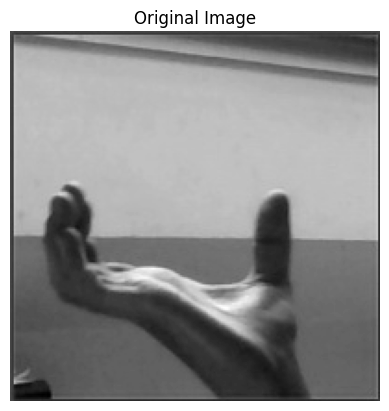

In [ ]:
# Convert image to uint8 grayscale for edge detection
gray_image = (image * 255).astype('uint8')  # Ensure pixel range is 0-255
if len(gray_image.shape) == 3:
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray'), plt.title('Original Image'), plt.axis('off')

In [ ]:
# Apply edge detection filters
roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])

In [ ]:
vertical = ndimage.convolve(gray_image, roberts_cross_v)
horizontal = ndimage.convolve(gray_image, roberts_cross_h)
edged_roberts = np.sqrt(np.square(horizontal) + np.square(vertical))

## **Roberts Filter**

(<Axes: title={'center': 'Roberts (skimage)'}>,
 Text(0.5, 1.0, 'Roberts (skimage)'),
 (-0.5, 199.5, 199.5, -0.5))

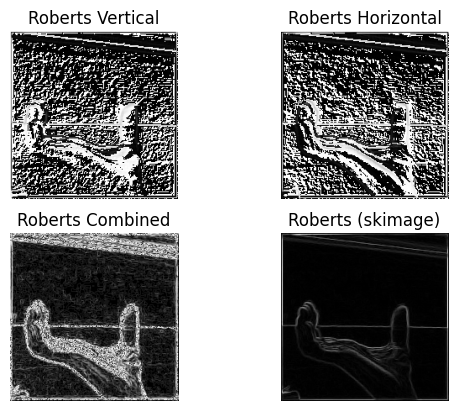

In [ ]:
roberts_edges = filters.roberts(gray_image)
plt.subplot(221), plt.imshow(vertical, cmap='gray'), plt.title('Roberts Vertical'), plt.axis('off')
plt.subplot(222), plt.imshow(horizontal, cmap='gray'), plt.title('Roberts Horizontal'), plt.axis('off')
plt.subplot(223), plt.imshow(edged_roberts, cmap='gray'), plt.title('Roberts Combined'), plt.axis('off')
plt.subplot(224), plt.imshow(roberts_edges, cmap='gray'), plt.title('Roberts (skimage)'), plt.axis('off')

## **Prewitt filter**

(<matplotlib.image.AxesImage at 0x7a26cb2802b0>,
 Text(0.5, 1.0, 'Prewitt'),
 (-0.5, 199.5, 199.5, -0.5))

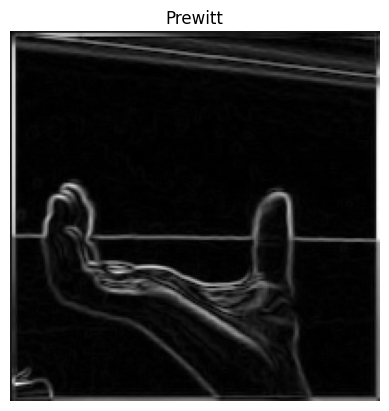

In [ ]:
prewitt_edges = filters.prewitt(gray_image)
plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt'), plt.axis('off')

## **Sobel filter**


(<matplotlib.image.AxesImage at 0x7a26cb2e87f0>,
 Text(0.5, 1.0, 'Sobel'),
 (-0.5, 199.5, 199.5, -0.5))

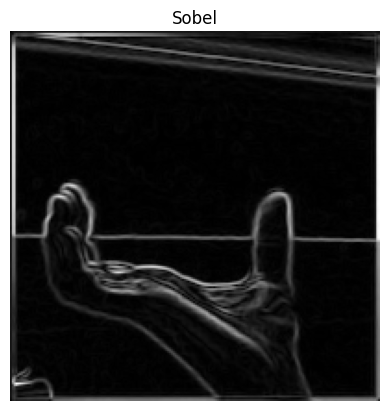

In [ ]:
sobel_edges = filters.sobel(gray_image)
plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel'), plt.axis('off')

## **Laplacian filter**

(<matplotlib.image.AxesImage at 0x7a26cb13e860>,
 Text(0.5, 1.0, 'Laplacian (Gaussian)'),
 (-0.5, 199.5, 199.5, -0.5))

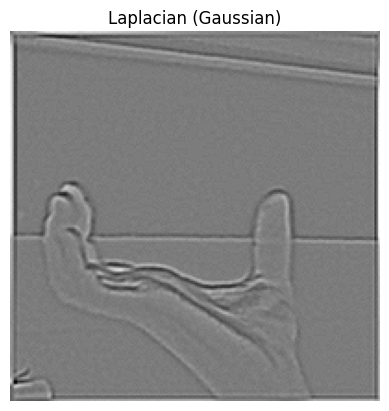

In [ ]:
gray_blur = cv2.GaussianBlur(gray_image, (3, 3), 0)
laplacian = cv2.Laplacian(gray_blur, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian (Gaussian)'), plt.axis('off')

## **Canny filter**

(<matplotlib.image.AxesImage at 0x7a26cb1955d0>,
 Text(0.5, 1.0, 'Canny Edge Detection'),
 (-0.5, 199.5, 199.5, -0.5))

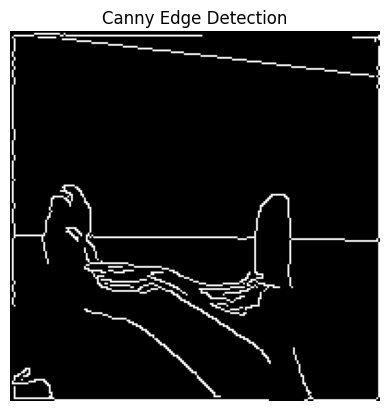

In [ ]:
canny_edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection'), plt.axis('off')

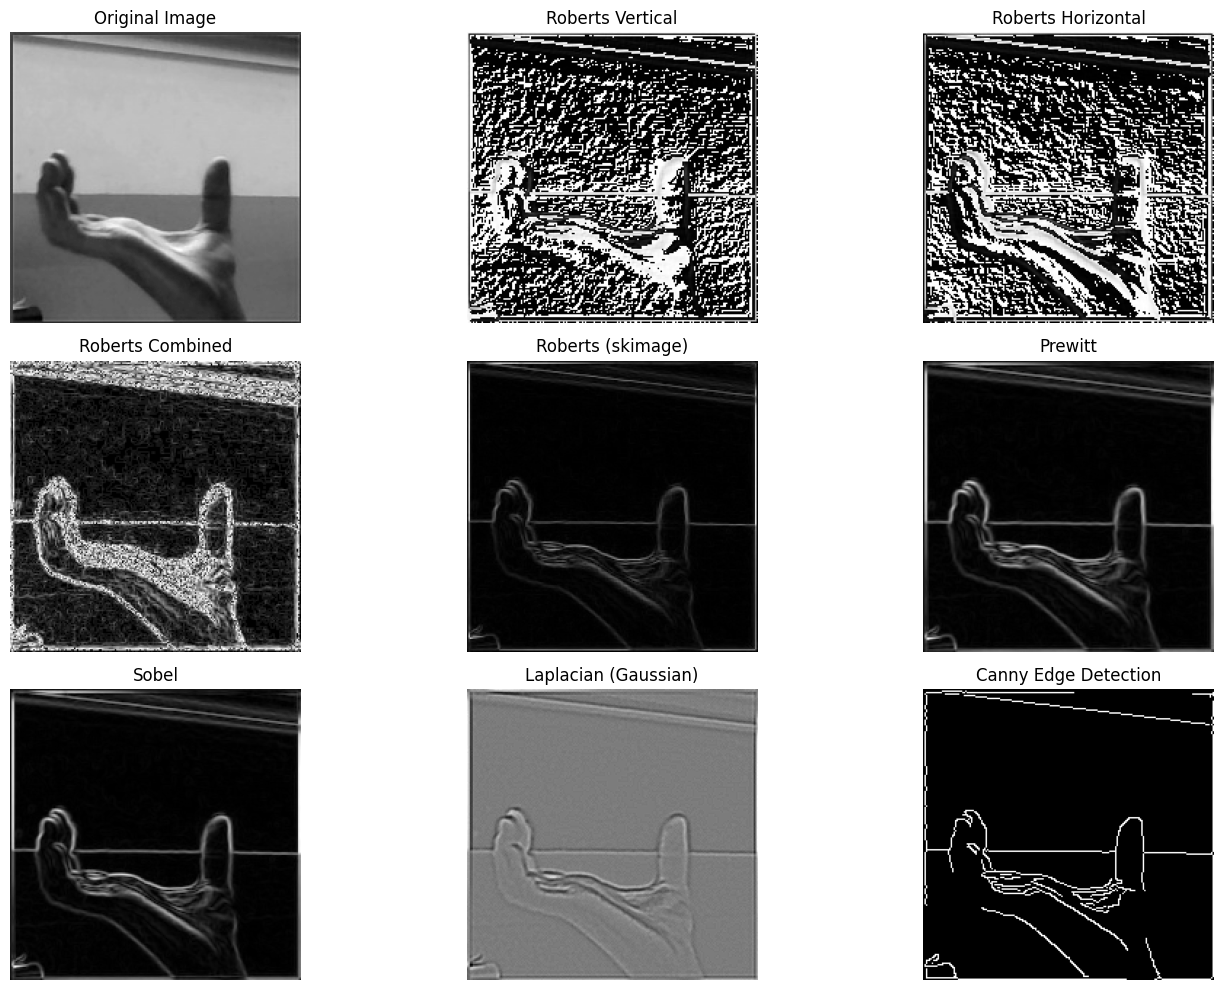

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(331), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(332), plt.imshow(vertical, cmap='gray'), plt.title('Roberts Vertical'), plt.axis('off')
plt.subplot(333), plt.imshow(horizontal, cmap='gray'), plt.title('Roberts Horizontal'), plt.axis('off')
plt.subplot(334), plt.imshow(edged_roberts, cmap='gray'), plt.title('Roberts Combined'), plt.axis('off')
plt.subplot(335), plt.imshow(roberts_edges, cmap='gray'), plt.title('Roberts (skimage)'), plt.axis('off')
plt.subplot(336), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt'), plt.axis('off')
plt.subplot(337), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel'), plt.axis('off')
plt.subplot(338), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian (Gaussian)'), plt.axis('off')
plt.subplot(339), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection'), plt.axis('off')

plt.tight_layout()
plt.show()